<a href="https://colab.research.google.com/github/Aranzasuu/ADA-Informes/blob/main/Bucket_Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. PROBLEMA DE ORDENAMIENTO**

A lo largo del curso hemos visto distintos problemas de ordenamiento que surgen normalmente en la ciencia de computación, como también hemos visto distintas soluciones.

![image](https://i.imgur.com/aAwSof4.png)

## DATOS
**${↪}$ 𝙴𝚗𝚝𝚛𝚊𝚍𝚊:** Una secuencia de $n$ elementos, $[a_1,a_2,a_3,...,a_n]$, es decir que va desde el elemento 1 hasta el $n$ (total de elementos), teniendo en cuenta que pertenecen al conjunto de los reales.

**${↪}$ 𝚂𝚊𝚕𝚒𝚍𝚊:** Corresponde a la misma secuencia de entrada $[a_1',a_2',a_3',...,a_n']$, pero esta vez ordenada de menor a mayor, tal que $a_1 ≤ a_2 ≤ a_3 ≤ ... ≤ a_n$.

# **2. ALGORITMO BUCKET SORT**

Corresponde a un algoritmo de ordenamiento que distribuye todos los elementos a ordenar entre un número finito de casilleros. Cada casillero solo puede contener los elementos que cumplan unas determinadas condiciones. En el ejemplo esas condiciones son intervalos de números.

![image](https://upload.wikimedia.org/wikipedia/commons/3/39/Bucket_sort_2.png)

## **VENTAJAS**

- Es estable, cuando existen claves iguales se preserva el orden existente

- El tiempo para clasificar los elementos es constante, las claves repetidas entran a un mismo casillero.

## **DESVENTAJAS**

- El tiempo para clasificar los elementos en el peor de los casos es $O(n log(n))$.

- Se necesita una gran cantidad de memoria extra.

## DATOS

**${↪}$ 𝙴𝚗𝚝𝚛𝚊𝚍𝚊:** Una lista o arreglo con un total de n elementos (n ∈ ℝ).

**${↪}$ 𝚂𝚊𝚕𝚒𝚍𝚊:** El mismo arreglo pero con los elementos ordenados.

Al igual que muchos algoritmos, el bucket sort se utiliza como solución a los problemas de ordenamiento, pero es mucho más útil cuando la entrada se distribuye uniformemente en un rango. 

Un ejemplo de esto es ordenar elementos entre un rango de 0.0 a 1.0. 

## **PROCESO ALGORITMO**

1. Se divide el rango de los elementos en $n$ sub-intervalos de igual tamaño. Cada subintervalo se asocia a un balde o **bucket**.
2. Se recorre la secuencia y se van colocando los elementos *ordenados* en sus buckets correspondiente.

3. Al finalizar, se concatenan los buckets generando la secuencia ordenada.

In [166]:
# Importación de las librerías
import matplotlib.pyplot as plt
import math
import datetime
from timeit import repeat
import numpy as np
import random
from termcolor import colored

In [187]:
def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up  
    return b  
              
def bucket_sort(input_list, verbose):

    # Encontramos el valor máximo dentro de la lista y lo utilizamos como el largo 
    # de la lista para determinar que valor en la lista va en cual bucket.

    max_value = max(input_list)
    size = max_value/len(input_list)

    # Creamos n buckets vacíos donde n es igual al largo de la lista de entrada

    buckets_list= []
    for x in range(len(input_list)):
        buckets_list.append([])

    # Ponemos los elementos de la lista dentro de los distintos buckets basados
    # en el tamaño.
    if verbose:
      print("\n--- CREACIÓN BUCKETS ---\n")
    for i in range(len(input_list)):
        j = int (input_list[i] / size)
        if verbose:
          print("posición >>", j)
        if j != len (input_list):
            buckets_list[j].append(input_list[i])
            if verbose:
              print(str(buckets_list[:j-1]),",",colored(f"{str(buckets_list[j])}","green"),str(buckets_list[j+1:]))
        else:
            buckets_list[len(input_list) - 1].append(input_list[i])
            if verbose:
              print(str(buckets_list[:j-1]),",",colored(f"{str(buckets_list[j-1])}","green"),str(buckets_list[j:]))

    # Ordenamos los elementos dentro de los buckets utilizando Insertion Sort
    # Sort elements within the buckets using Insertion Sort
    for z in range(len(input_list)):
        insertionSort(buckets_list[z])
        if verbose:
          if z == 0:
            print("\n--- INSERTION SORT ---\n")
            print("Bucket inicial >>", buckets_list)
          else:
            print("Bucket n°",z,">>",buckets_list[z])
          
    if verbose:
        print("\n")
        
    # Concatenamos los buckets con los elementos ordenandos dentro de una sola lista.

    final_output = []
    if verbose:
      print("--- CONCATENACIÓN ---\n")
    for x in range(len(input_list)):
        final_output = final_output + buckets_list[x]
        if verbose:
          print("Concatenación n°",x+1,final_output)
    if verbose:
      print("\n")
    return final_output

# ENTRADA Y SALIDA
x = [9.8 , 0.6 , 10.1 , 1.9 , 3.07 , 3.04 , 5.0 , 8.0 , 4.8 , 7.68]
print('ORIGINAL LIST >>',end=" ")
print(x)
sorted_list = bucket_sort(x, verbose = False)
print('SORTED LIST >>',end=" ")
print(sorted_list)

ORIGINAL LIST >> [9.8, 0.6, 10.1, 1.9, 3.07, 3.04, 5.0, 8.0, 4.8, 7.68]
SORTED LIST >> [0.6, 1.9, 3.04, 3.07, 4.8, 5.0, 7.68, 8.0, 9.8, 10.1]


## **EJEMPLO PASO A PASO**

Para poder entender mejor la ejecucuión del algoritmo, veamos un ejemplo paso a paso.

**${↪}$ 𝙴𝚗𝚝𝚛𝚊𝚍𝚊:** $[0.7, 0.9, 0.5, 0.8, 0.17, 0.4, 1.0, 0.15, 0.7]$

**${↪}$ 𝚂𝚊𝚕𝚒𝚍𝚊:** $[0.15, 0.17, 0.4, 0.5, 0.7, 0.7, 0.8, 0.9, 1.0]$

In [188]:
arreglo = [0.7, 0.9, 0.5, 0.8, 0.17, 0.4, 1.0, 0.15, 0.7]
print("ORIGINAL LIST >>", colored(arreglo, 'cyan', attrs=['bold']))
sort_list = bucket_sort(arreglo, verbose = True)
print("SORTED LIST >>", colored(sort_list,'cyan', attrs=['bold']))

ORIGINAL LIST >> [0.7, 0.9, 0.5, 0.8, 0.17, 0.4, 1.0, 0.15, 0.7]

--- CREACIÓN BUCKETS ---

posición >> 6
[[], [], [], [], []] , [0.7] [[], []]
posición >> 8
[[], [], [], [], [], [], [0.7]] , [0.9] []
posición >> 4
[[], [], []] , [0.5] [[], [0.7], [], [0.9]]
posición >> 7
[[], [], [], [], [0.5], []] , [0.8] [[0.9]]
posición >> 1
[] , [0.17] [[], [], [0.5], [], [0.7], [0.8], [0.9]]
posición >> 3
[[], [0.17]] , [0.4] [[0.5], [], [0.7], [0.8], [0.9]]
posición >> 9
[[], [0.17], [], [0.4], [0.5], [], [0.7], [0.8]] , [0.9, 1.0] []
posición >> 1
[] , [0.17, 0.15] [[], [0.4], [0.5], [], [0.7], [0.8], [0.9, 1.0]]
posición >> 6
[[], [0.17, 0.15], [], [0.4], [0.5]] , [0.7, 0.7] [[0.8], [0.9, 1.0]]

--- INSERTION SORT ---

Bucket inicial >> [[], [0.17, 0.15], [], [0.4], [0.5], [], [0.7, 0.7], [0.8], [0.9, 1.0]]
Bucket n° 1 >> [0.15, 0.17]
Bucket n° 2 >> []
Bucket n° 3 >> [0.4]
Bucket n° 4 >> [0.5]
Bucket n° 5 >> []
Bucket n° 6 >> [0.7, 0.7]
Bucket n° 7 >> [0.8]
Bucket n° 8 >> [0.9, 1.0]


--- CONC

# **3. CORRECTITUD**

## **3.1 Insertion Sort**

El algoritmo *insertion sort* ordenado dentro del mismo arreglo los elementos, sin la necesidad de crear un auxiliar.

## Prueba del Teorema

Previamente observamos que en cada iteración agregamos un nuevo elemento y lo insertamos en la posición correspondiente.

Para probarlo utilizaremos la **propiedad invariante de bucle**:

- El arreglo que utilizamos para realizar el algoritmo, contiene los mismos elementos, ya que sólo se mueven durante la ejecución pero no cambian. 

> **Incialización:** Al comienzo de la primera iteración, los datos desde la posición 0 hasta i-1 cumplen la propiedad ya que estos no cambian en el proceso.
>
> **Mantención:** En cada iteración se cumple la propiedad, ya que los elementos siguen siendo los mismos con la diferencia de que están en distinto orden, es decir los elementos mayores del arreglo están ordenados de mayor a menor.

## **3.2 Bucket Sort**

Para poder probar la correctitud del bucket sort, utilizaremos **inducción matemática**, para probarla debemos:

1. Probar $P(n)$ para un caso base, por ejemplo $P(1)$

2. Probar que si $P(m)$ es cierto $m < n$, entonces $P(n)$ también lo es.

> **Caso Base:** Van haber casos en los que el bucket tendrá sólo un elemento, por lo que se asume que están ordenados, además que los buckets contendrán elementos menores a los buckets que le siguen.
>
> **Caso Promedio:** Por lo que para $P(m)$ al utilizar insertionSort nos aseguramos que los buckets contienen los mismo elementos pero ordenados de menor a mayor.



# **4. TIEMPO DE EJECUCIÓN**

## **4.1 INSERTION SORT**

> **Mejor caso:** Corresponde cuando el arreglo está ordenado, ejecutándose el ciclo únicamente n veces (n = total de elementos), sin necesidad de intercambiar posiciones, ya que sólo recorre una vez.
>
> $$T(n) = O(n)$$
>
> **Caso promedio:** Este se da cuando los elementos no están en orden ascendiente ni descendiente.
>
> $$T(n) = O(n^2)$$
>
> **Peor caso:** Este sucede cuando los elementos están ordenados de manera contraria a como serán ordenados, cada elemento tendrá que ser comparado con todos los elementos anteriores.
>
> $$T(n) = O(n^2)$$

## **4.2 BUCKET SORT**

Excluyendo el tiempo tomado por el insertion sort, bucket sort toma tiempo lineal. Así debemos cuantificar cuanto tiempo toman las n llamadas a insertion sort.

![image](https://i.imgur.com/tnKDYsv.jpg)

Pero, dependiendo el caso, no tienen la misa complejidad:

> **Mejor Caso:** El promedio y el mejor caso corresponde al mismo tiempo de ejecución. Corresponde cuando los elementos están distribuidos aleatoriamente, así dando resultados muy eficientes.
> $$T(n) = O(n + k)$$
>
> Donde n corresponde al número de elementos y k el rango de valores.
>
> **Peor Caso:** El peor caso se produce cuando muchos elementos están muy cerca y se agrupan en el mismo bucket. Esto elimina todas las ventajas de dividir las entradas en cubos.
> $$T(n) = O(n^2)$$
>
> Donde n corresponde al número de elementos.

# **5. EXPERIMENTACIÓN**

## **ALGORITMO RADIX SORT**

In [169]:
def countingSort(arr, exp1):
    n = len(arr)
    output = [0] * (n)
    count = [0] * (10)
 
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]
 
def radixSort(arr):
    max1 = max(arr)
    exp = 1

    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10
    return arr

arr = [170, 45, 75, 90, 802, 24, 2, 66]
print("ORIGINAL LIST >>", arr)
sorted = radixSort(arr)
print("SORTED LIST >> ", sorted)


ORIGINAL LIST >> [170, 45, 75, 90, 802, 24, 2, 66]
SORTED LIST >>  [2, 24, 45, 66, 75, 90, 170, 802]


## **ALGORITMO COUNTING SORT**

In [170]:
def count_sort(arr):
    max_element = int(max(arr))
    min_element = int(min(arr))
    range_of_elements = max_element - min_element + 1

    count_arr = [0 for _ in range(range_of_elements)]
    output_arr = [0 for _ in range(len(arr))]

    for i in range(0, len(arr)):
        count_arr[arr[i]-min_element] += 1

    for i in range(1, len(count_arr)):
        count_arr[i] += count_arr[i-1]

    for i in range(len(arr)-1, -1, -1):
        output_arr[count_arr[arr[i] - min_element] - 1] = arr[i]
        count_arr[arr[i] - min_element] -= 1

    for i in range(0, len(arr)):
        arr[i] = output_arr[i]
 
    return arr

arr = [-5, -10, 0, -3, 8, 5, -1, 10]
print("ORIGINAL LIST >>",arr)
ans = count_sort(arr)
print("SORTED LSIT >>",str(ans))

ORIGINAL LIST >> [-5, -10, 0, -3, 8, 5, -1, 10]
SORTED LSIT >> [-10, -5, -3, -1, 0, 5, 8, 10]


## **5.1 Gráfica Tiempo de Ejecución Bucket Sort v/s Radix Sort v/s Counting Sort**

> Con valores altos


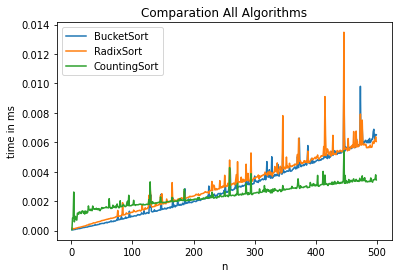

In [180]:
w=[]; r=[]; y=[]; y1=[];

for j in range(1,500):

  e = random.sample(range(1, 1000), j)

  bu = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({e},{False})", repeat=1, number=10)
  ra = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({e})", repeat=1, number=10)
  cs = repeat(setup="from __main__ import count_sort", stmt=f"count_sort({e})", repeat=1, number=10)

  w.append(j)
  r.append(bu)
  y.append(ra)
  y1.append(cs)


plt.plot(w,r)
plt.plot(w,y)
plt.plot(w,y1)
plt.legend(["BucketSort","RadixSort","CountingSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title('Comparation All Algorithms')
plt.show()

## **5.2 Gráfica Tiempo de Ejecución Bucket Sort v/s Radix Sort v/s Counting Sort**

> Con valores bajos

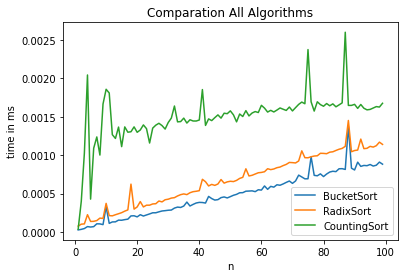

In [179]:
w=[]; r=[]; y=[]; y1=[];

for j in range(1,100):

  e = random.sample(range(1, 1000), j)

  bu = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({e},{False})", repeat=1, number=10)
  ra = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({e})", repeat=1, number=10)
  cs = repeat(setup="from __main__ import count_sort", stmt=f"count_sort({e})", repeat=1, number=10)

  w.append(j)
  r.append(bu)
  y.append(ra)
  y1.append(cs)


plt.plot(w,r)
plt.plot(w,y)
plt.plot(w,y1)
plt.legend(["BucketSort","RadixSort","CountingSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title('Comparation All Algorithms')
plt.show()

- Como podemos observar, cuando el rango de valores es **bajo**, el mejor algoritmo entre estos 3 es el *Bucket Sort*, mientras que en valores más **altos**, el mejor algoritmo corresponde al *counting sort* aunque no haya mucha diferencia con el *Radix Sort*.

## **ALGORITMO BUBBLE SORT**

In [172]:
def bubble_sort(a):
    n = len(a)
    T = 0

    for i in range(1,n+1):
        already_sorted = True

        for j in range(n - i):
            T +=1
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]

                already_sorted = False

        if already_sorted:
            break

    return a, T

A = [5,8,7,1,3]
print("ORIGINAL LIST >> ",A)
A, counter = bubble_sort(A)
print("SORTED LIST >>",A)
print("COMPARACIONES >>", counter)

ORIGINAL LIST >>  [5, 8, 7, 1, 3]
SORTED LIST >> [1, 3, 5, 7, 8]
COMPARACIONES >> 10


## **ALGORITMO HEAP SORT**

In [173]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
 
    if l < n and arr[i] < arr[l]:
        largest = l
 
    if r < n and arr[largest] < arr[r]:
        largest = r
 
    if largest != i:
        (arr[i], arr[largest]) = (arr[largest], arr[i]) 
        heapify(arr, n, largest)
 
def heapSort(arr):
    n = len(arr)
 
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
 
    for i in range(n - 1, 0, -1):
        (arr[i], arr[0]) = (arr[0], arr[i])
        heapify(arr, i, 0)
    return arr
 
arr = [12, 11, 13, 5, 6, 7]
print("ORIGINAL LIST >>",arr)
ans = heapSort(arr)
print("SORTED LIST >>",ans)


ORIGINAL LIST >> [12, 11, 13, 5, 6, 7]
SORTED LIST >> [5, 6, 7, 11, 12, 13]


## **ALGORITMO INSERTION SORT**

In [174]:
def insertionSort(arr):
    comp = 0
    vuelta = 1

    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
            comp += 1
        arr[j+1] = key

    return arr, comp

arr = [20,14,3,8,7]
print("ORIGINAL LIST >>", arr)
ans, comp = insertionSort(arr)
print("SORTED LIST >>", arr)
print("COMPARACIONES >>", comp)

ORIGINAL LIST >> [20, 14, 3, 8, 7]
SORTED LIST >> [3, 7, 8, 14, 20]
COMPARACIONES >> 8


## **ALGORITMO MERGE SORT**

In [175]:
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m

    L = [0] * (n1)
    R = [0] * (n2)
 
    for i in range(0, n1):
        L[i] = arr[l + i]
 
    for j in range(0, n2):
        R[j] = arr[m + 1 + j]

    i = 0
    j = 0
    k = l
 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
 
def mergeSort(arr, l, r):
    if l < r:
        m = l+(r-l)//2
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)

arr = [12, 11, 13, 5, 6, 7]
n = len(arr)
print("ORIGINAL LIST >> ",end="[ ")
for i in range(n):
    print("%d" % arr[i],end=" ")
print("]")
mergeSort(arr, 0, n-1)
print("\nSORTED LIST >> ",end="[ ")
for i in range(n):
    print("%d" % arr[i],end=" ")
print("]")

ORIGINAL LIST >> [ 12 11 13 5 6 7 ]

SORTED LIST >> [ 5 6 7 11 12 13 ]


## **ALGORITMO QUICK SORT**

In [176]:
def partition(l, r, nums):

    pivot, ptr = nums[r], l
    for i in range(l, r):
        if nums[i] <= pivot:
            nums[i], nums[ptr] = nums[ptr], nums[i]
            ptr += 1

    nums[ptr], nums[r] = nums[r], nums[ptr]
    return ptr
 
def quicksort(l, r, nums):
    if len(nums) == 1:
        return nums
    if l < r:
        pi = partition(l, r, nums)
        quicksort(l, pi-1, nums)
        quicksort(pi+1, r, nums)
    return nums
 
example = [2, 5, 6, 1, 4, 6, 2, 4, 7, 8]
print("ORIGINAL LIST >>",example)
print("SORTED LIST >>",quicksort(0, len(example)-1, example))

ORIGINAL LIST >> [2, 5, 6, 1, 4, 6, 2, 4, 7, 8]
SORTED LIST >> [1, 2, 2, 4, 4, 5, 6, 6, 7, 8]


## **5.3 Gráfica comparativa de todos los algoritmos**

> Con valores altos



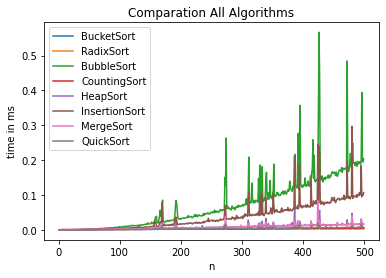

In [181]:
w=[]; r=[]; y=[]; y1=[]; y2=[]; y3=[]; y4=[]; y5=[]; y6=[]

for j in range(1,500):

  e = random.sample(range(1, 1000), j)

  bu = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({e},{False})", repeat=1, number=10)
  ra = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({e})", repeat=1, number=10)
  bbl = repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({e})", repeat=1, number=10)
  cs = repeat(setup="from __main__ import count_sort", stmt=f"count_sort({e})", repeat=1, number=10)
  hp = repeat(setup="from __main__ import heapSort", stmt=f"heapSort({e})", repeat=1, number=10)
  ins = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({e})", repeat=1, number=10)
  mrg = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({e},{0},{len(e)-1})", repeat=1, number=10)
  qs = repeat(setup="from __main__ import quicksort", stmt=f"quicksort({0},{len(e)-1},{e})", repeat=1, number=10)

  w.append(j)
  r.append(bu)
  y.append(ra)
  y1.append(bbl)
  y2.append(cs)
  y3.append(hp)
  y4.append(ins)
  y5.append(mrg)
  y6.append(qs)

plt.plot(w,r)
plt.plot(w,y)
plt.plot(w,y1)
plt.plot(w,y2)
plt.plot(w,y3)
plt.plot(w,y4)
plt.plot(w,y5)
plt.plot(w,y6)
plt.legend(["BucketSort","RadixSort","BubbleSort","CountingSort","HeapSort","InsertionSort","MergeSort","QuickSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title('Comparation All Algorithms')
plt.show()

## **Gráfica comparativa de todos los algoritmos**

> Con valores bajos

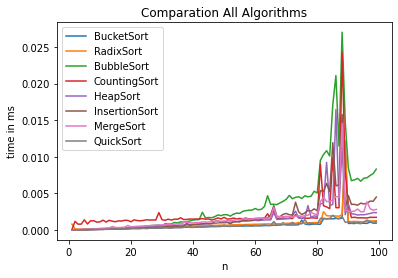

In [182]:
w=[]; r=[]; y=[]; y1=[]; y2=[]; y3=[]; y4=[]; y5=[]; y6=[]

for j in range(1,100):

  e = random.sample(range(1, 1000), j)

  bu = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({e},{False})", repeat=1, number=10)
  ra = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({e})", repeat=1, number=10)
  bbl = repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({e})", repeat=1, number=10)
  cs = repeat(setup="from __main__ import count_sort", stmt=f"count_sort({e})", repeat=1, number=10)
  hp = repeat(setup="from __main__ import heapSort", stmt=f"heapSort({e})", repeat=1, number=10)
  ins = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({e})", repeat=1, number=10)
  mrg = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({e},{0},{len(e)-1})", repeat=1, number=10)
  qs = repeat(setup="from __main__ import quicksort", stmt=f"quicksort({0},{len(e)-1},{e})", repeat=1, number=10)

  w.append(j)
  r.append(bu)
  y.append(ra)
  y1.append(bbl)
  y2.append(cs)
  y3.append(hp)
  y4.append(ins)
  y5.append(mrg)
  y6.append(qs)

plt.plot(w,r)
plt.plot(w,y)
plt.plot(w,y1)
plt.plot(w,y2)
plt.plot(w,y3)
plt.plot(w,y4)
plt.plot(w,y5)
plt.plot(w,y6)
plt.legend(["BucketSort","RadixSort","BubbleSort","CountingSort","HeapSort","InsertionSort","MergeSort","QuickSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title('Comparation All Algorithms')
plt.show()

- Como podemos observar de ambos gráficos, donde se comparan con otros algoritmos de ordenamiento vistos en el curso, cuando los valores son de un rango alto (0 - 500) el mejor algoritmo corresponde entre el *Counting Sort* y el *Quick Sort*, mientras que los valores corresponde a un rango más bajo (0 - 100) el *Quick Sort* y el *Bucket Sort* son los más eficientes.